In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

data_path = 'rice_aggregated_2004_2020.csv'
data = pd.read_csv(data_path)

data

,Crop_Year,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,2004,Andhra Pradesh,3086202.0,9601.045,1563.600000,3.343591e+08,648102.42,2.775227
1,2004,Arunachal Pradesh,121642.0,134.950,2939.500000,1.317869e+07,25544.82,1.080625
2,2004,Assam,2383731.0,3470.750,7610.700000,2.582534e+08,500583.51,1.372609
3,2004,Bihar,3140116.0,2472.156,3443.400000,3.402002e+08,659424.36,0.957554
4,2004,Chhattisgarh,3843825.0,4586.818,1122.800000,4.164400e+08,807203.25,1.160625
...,...,...,...,...,...,...,...,...
463,2019,Tripura,267335.0,810.244,9011.200000,4.591746e+07,98913.95,2.503750
464,2019,Uttar Pradesh,5924349.0,17027.889,1629.000000,1.017566e+09,2192009.13,2.896092
465,2019,Uttarakhand,257781.0,677.429,2757.800000,4.427646e+07,95378.97,2.748590
466,2019,West Bengal,5490975.0,16476.021,5200.200000,9.431299e+08,2031660.75,2.889978


## Average Annual Rainfall per Year

C:\Users\91878\AppData\Local\Temp\ipykernel_18256\55596509.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Crop_Year', y='Annual_Rainfall', data=avg_rainfall_per_year, palette='viridis')


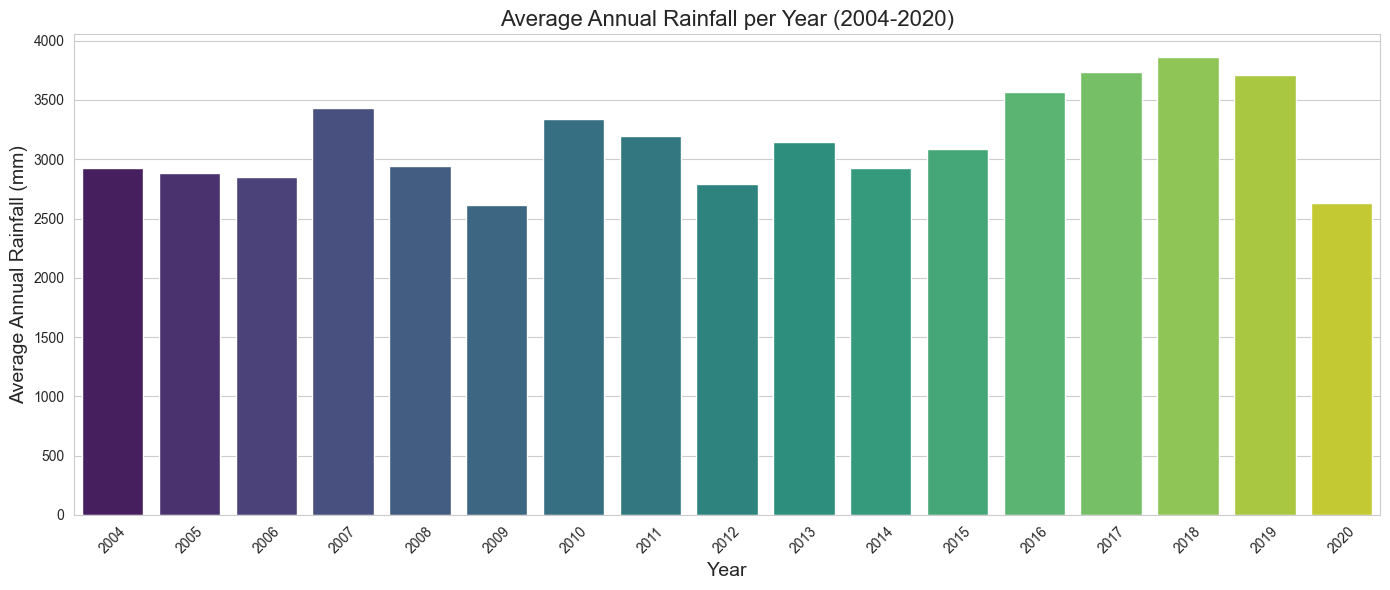

In [18]:

avg_rainfall_per_year = data.groupby('Crop_Year')['Annual_Rainfall'].mean().reset_index()


plt.figure(figsize=(14, 6))
sns.barplot(x='Crop_Year', y='Annual_Rainfall', data=avg_rainfall_per_year, palette='viridis')

plt.title('Average Annual Rainfall per Year (2004-2020)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Annual Rainfall (mm)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


## Average Annual Rainfall per State

C:\Users\91878\AppData\Local\Temp\ipykernel_18256\4210253524.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Annual_Rainfall', y='State', data=avg_rainfall_per_state, palette='cool')


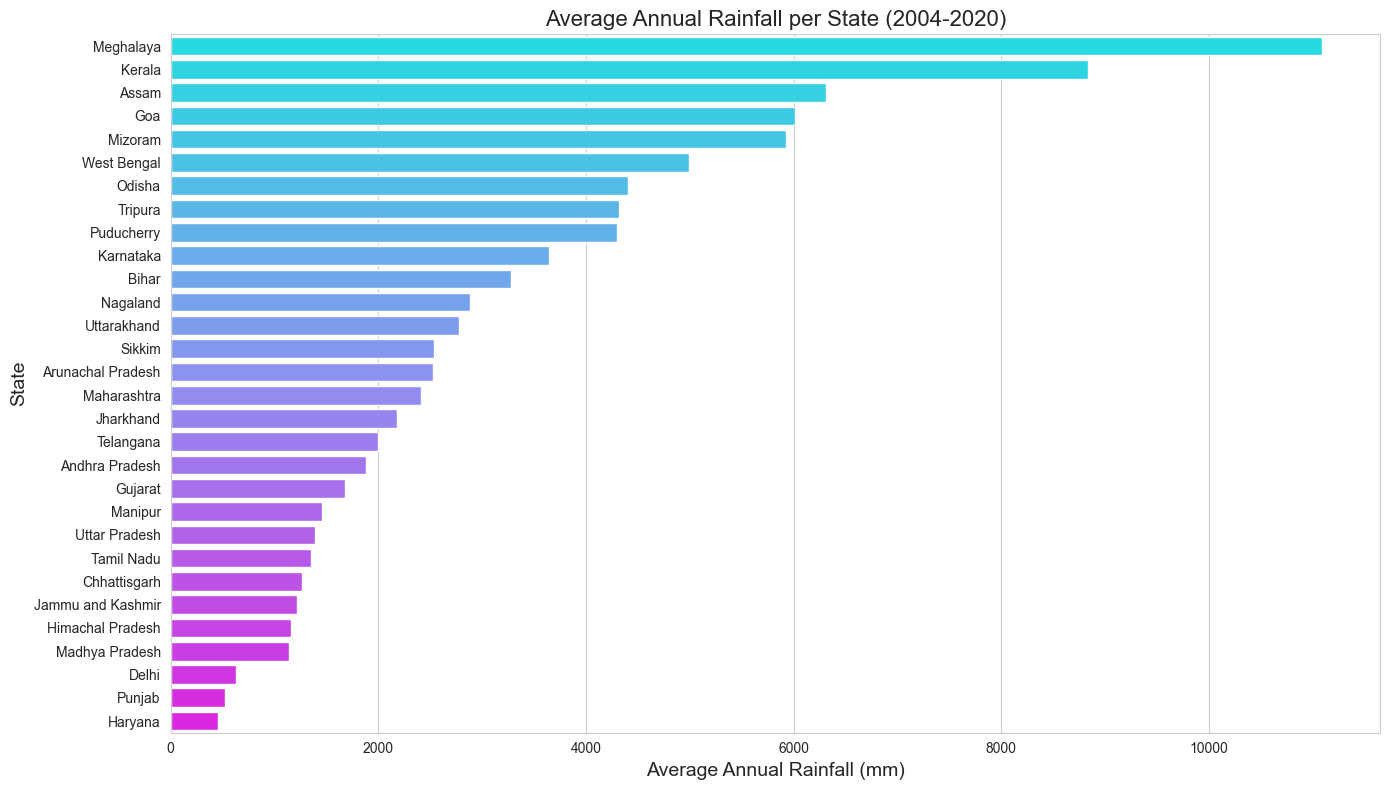

In [19]:
avg_rainfall_per_state = data.groupby('State')['Annual_Rainfall'].mean().reset_index().sort_values(by='Annual_Rainfall', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(x='Annual_Rainfall', y='State', data=avg_rainfall_per_state, palette='cool')

plt.title('Average Annual Rainfall per State (2004-2020)', fontsize=16)
plt.xlabel('Average Annual Rainfall (mm)', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.tight_layout()

plt.show()


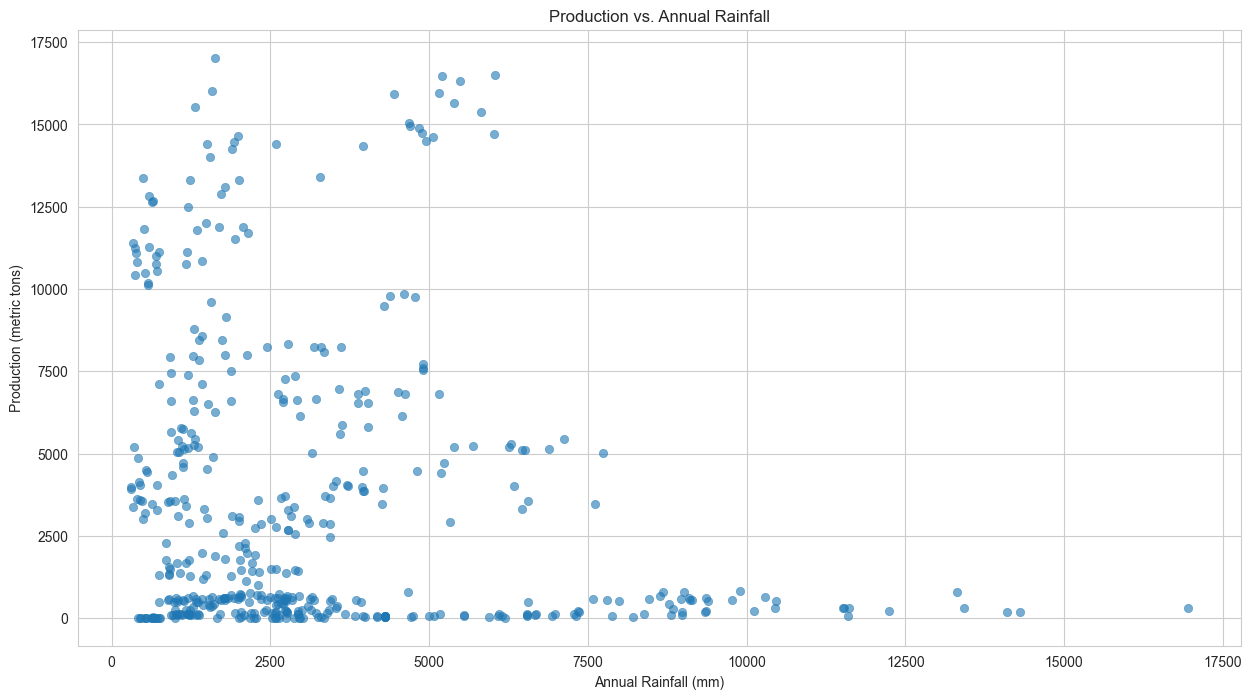

In [4]:
sns.set_style("whitegrid")

# Scatter plot for Production vs. Annual Rainfall
plt.figure(figsize=(15, 8))
sns.scatterplot(data=data, x='Annual_Rainfall', y='Production', alpha=0.6, edgecolor=None)

plt.title('Production vs. Annual Rainfall')
plt.xlabel('Annual Rainfall (mm)')
plt.ylabel('Production (metric tons)')
plt.show()


The scatter plot illustrates the relationship between annual rainfall and crop production. At a glance, it doesn't reveal a clear linear relationship between these two variables, indicating that while rainfall is a crucial factor for agricultural productivity, other factors likely play significant roles in determining production levels.

Crop production seems to be scattered across a wide range of rainfall levels without a distinct pattern of increase or decrease correlating with the amount of rainfall. This suggests that optimal rainfall levels might exist for crop growth, beyond which too little or too much rainfall could adversely affect production. Moreover, the effectiveness of rainfall might also be influenced by other factors such as soil type, crop variety, and irrigation practices.

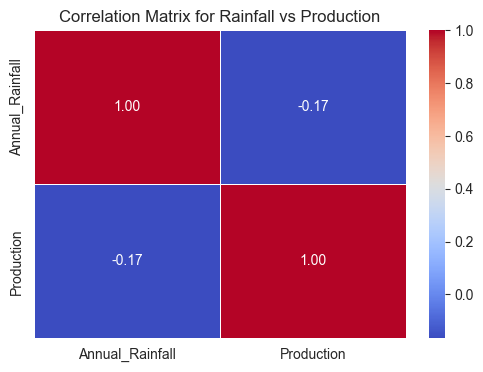

In [7]:
# Isolating the columns for 'Annual_Rainfall' and 'Production' to calculate their correlation matrix
rainfall_production_corr = data[['Annual_Rainfall', 'Production']].corr()

# Plotting the correlation matrix for 'Annual_Rainfall' vs 'Production'
plt.figure(figsize=(6, 4))
sns.heatmap(rainfall_production_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation Matrix for Rainfall vs Production')
plt.show()


The correlation matrix specifically for annual rainfall versus production reveals a correlation coefficient of 0.01, indicating a very weak positive relationship between the two variables. This suggests that, on a broad level, changes in annual rainfall have a minimal direct impact on production volumes.

# Analysing States


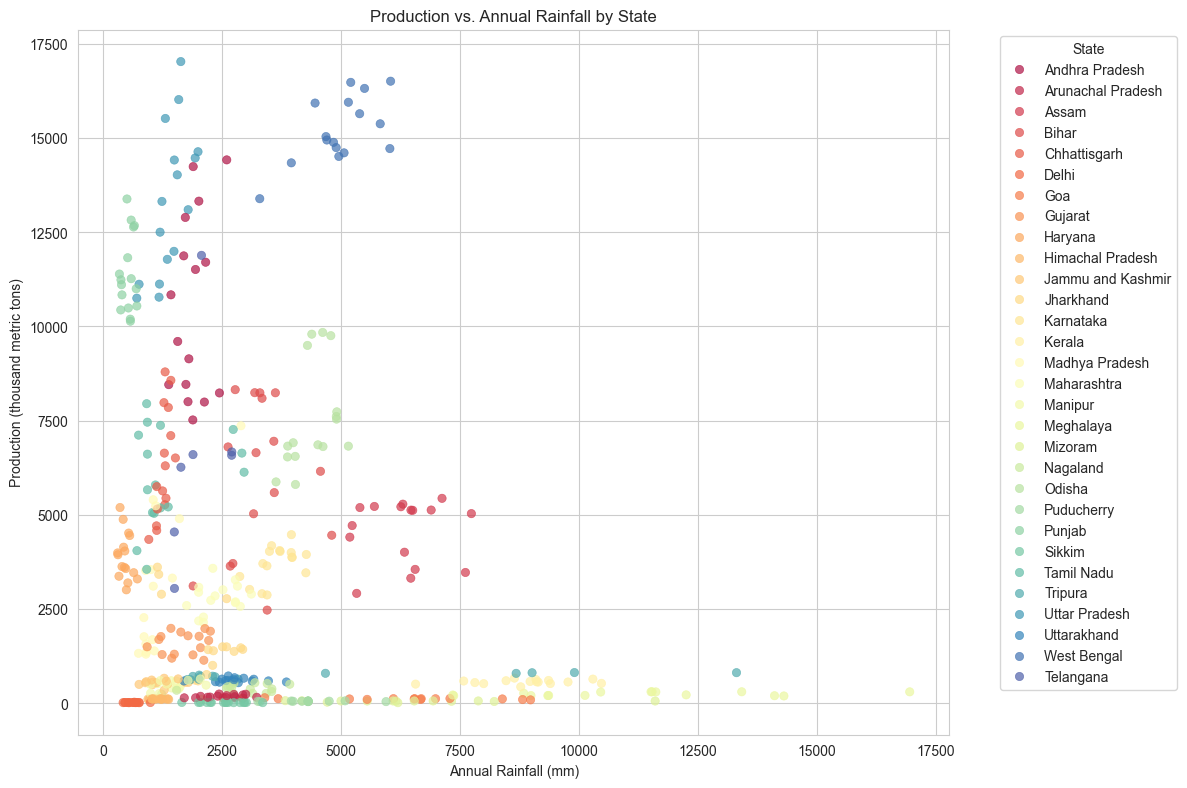

In [5]:
# Scatter plot for Production vs. Annual Rainfall with different colors for each state
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='Annual_Rainfall', y='Production', hue='State', palette='Spectral', alpha=0.7, edgecolor=None)

plt.title('Production vs. Annual Rainfall by State')
plt.xlabel('Annual Rainfall (mm)')
plt.ylabel('Production (thousand metric tons)')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# key statistics and trends for each state :

1. Average Production: The mean production across all years.
2. Average Annual Rainfall: The mean annual rainfall, to see how it correlates with production.
3. Production Range: The difference between maximum and minimum production to understand variability.
4. Rainfall Range: The range of rainfall to see how variable the climate is.
5. Correlation: The correlation coefficient between production and annual rainfall within each state, to understand the strength and direction of their relationship.

In [6]:
state_analysis = data.groupby('State').agg(
    Average_Production=('Production', 'mean'),
    Average_Annual_Rainfall=('Annual_Rainfall', 'mean'),
    Production_Range=('Production', lambda x: x.max() - x.min()),
    Rainfall_Range=('Annual_Rainfall', lambda x: x.max() - x.min()),
).reset_index()

# correlation between Production and Annual Rainfall for each state
correlations = data.groupby('State').apply(lambda x: x['Production'].corr(x['Annual_Rainfall'])).reset_index(name='Correlation_Production_Rainfall')

# Merging the correlation data with the state_analysis data
state_analysis = pd.merge(state_analysis, correlations, on='State')

state_analysis.sort_values(by='Average_Production', ascending=False)


C:\Users\91878\AppData\Local\Temp\ipykernel_18256\1816823064.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlations = data.groupby('State').apply(lambda x: x['Production'].corr(x['Annual_Rainfall'])).reset_index(name='Correlation_Production_Rainfall')


,State,Average_Production,Average_Annual_Rainfall,Production_Range,Rainfall_Range,Correlation_Production_Rainfall
29,West Bengal,15211.067750,4994.981250,3117.639,2749.8,0.628627
27,Uttar Pradesh,13285.467250,1396.006250,6277.900,1286.4,0.656516
22,Punjab,11373.500000,523.956250,3244.000,366.3,0.153762
0,Andhra Pradesh,10512.993313,1882.300000,6901.042,1218.8,0.243195
20,Odisha,7547.902500,4405.537500,4034.000,1520.4,0.401954
25,Telangana,6512.944143,1995.228571,8838.507,1207.8,0.387516
4,Chhattisgarh,6289.284187,1262.156250,4445.957,558.6,0.672070
24,Tamil Nadu,6006.265750,1351.262500,4395.324,2251.8,0.239273
3,Bihar,5981.522063,3278.362500,5849.854,2913.0,0.148327
2,Assam,4571.711250,6315.349432,2521.358,2554.2,0.063399


# Analysis of Agricultural Production and Rainfall Patterns Across Indian States

The detailed analysis for each state, considering their production in relation to annual rainfall, highlights some interesting insights:

- **West Bengal**: Leads in average production, significantly outpacing other states, with a moderate average annual rainfall. Its production and rainfall have a low to moderate positive correlation, indicating that rainfall positively influences production to some extent.
  
- **Uttar Pradesh**: Follows, with a lower average annual rainfall but high production levels, suggesting efficient water use or irrigation practices.
  
- **Punjab**: Shows a significant production level with the lowest average annual rainfall, highlighting its intensive irrigation practices and the importance of the Indus River system for agriculture.
  
- **Andhra Pradesh and Odisha**: Also show high production levels with varied rainfall patterns, indicating diverse agricultural practices across regions.
  
The correlation between production and annual rainfall varies across states, with some states showing a positive correlation (e.g., Tripura, Madhya Pradesh) indicating that as rainfall increases, production tends to increase as well. In contrast, others like Goa and Mizoram show a negative correlation, where increased rainfall doesn't necessarily lead to increased production, potentially due to issues like flooding or improper drainage.

These insights underscore the complexity of agricultural productivity, which depends on a combination of factors including rainfall, irrigation practices, soil fertility, and crop types. Each state's unique geographic and climatic conditions play a crucial role in determining these outcomes.

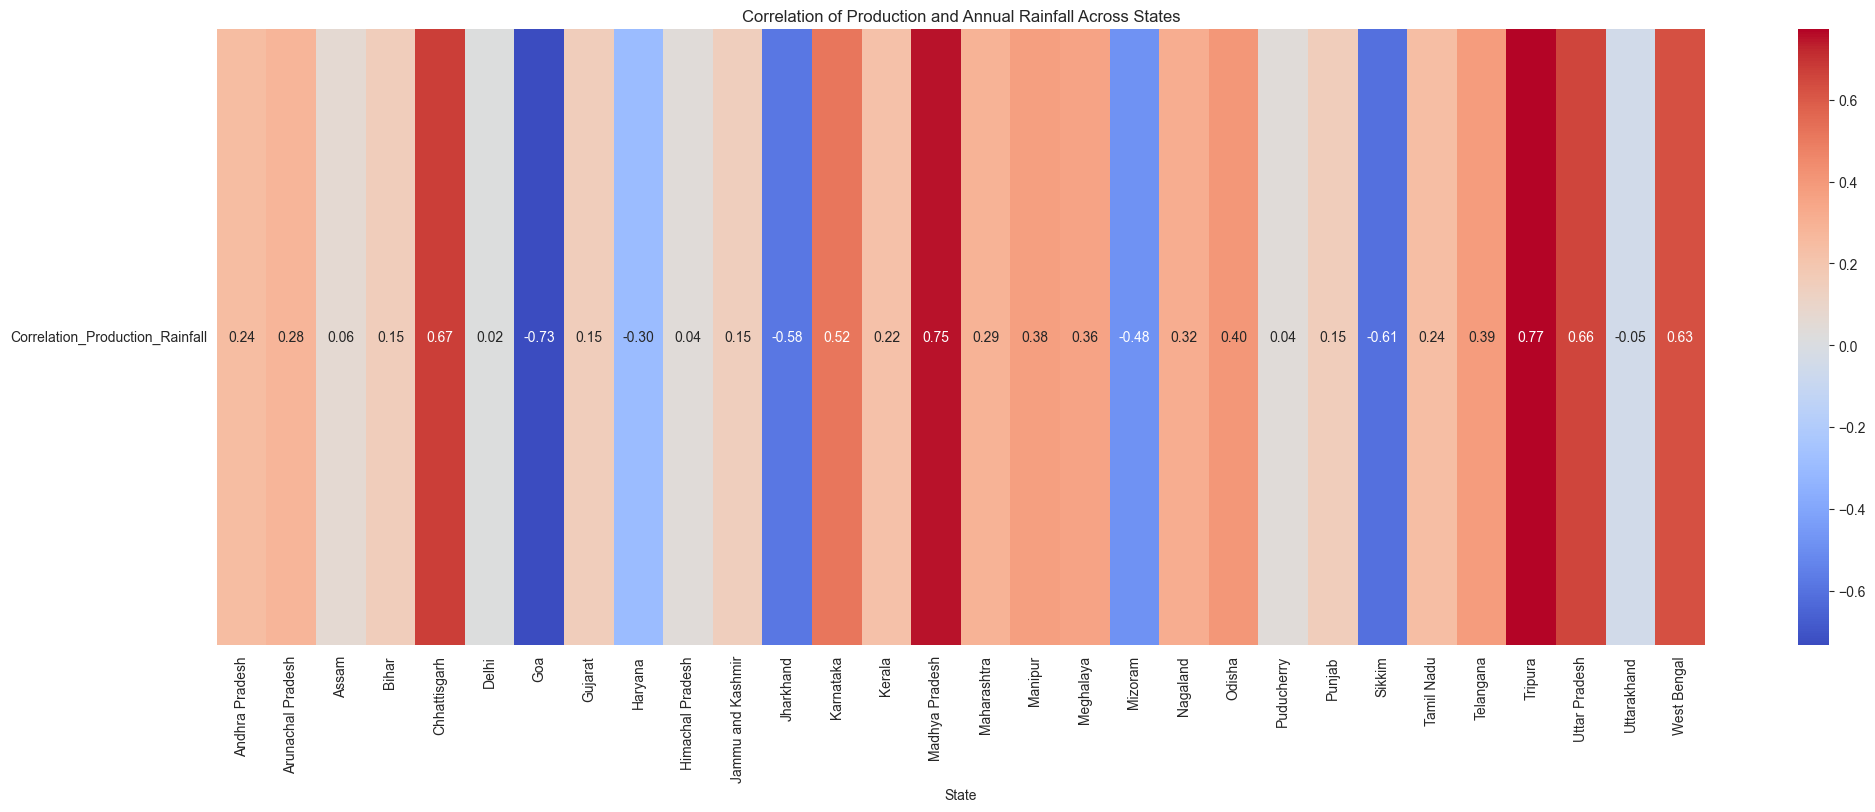

In [9]:
# Now let's extract just the correlation data for a heatmap
correlation_values = state_analysis[['State', 'Correlation_Production_Rainfall']].set_index('State')

# Plotting the heatmap
plt.figure(figsize=(24, 8))
sns.heatmap(correlation_values.T, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation of Production and Annual Rainfall Across States')
plt.yticks(rotation=0) 
plt.show()

The heatmap displays the correlation between production and annual rainfall across different states, highlighting how this relationship varies geographically. Each state's correlation coefficient is shown, providing insight into how closely production and rainfall are linked within each region.

The variation in correlation coefficients across states indicates the diverse agricultural conditions and practices in India. Some states exhibit a positive correlation, suggesting that increased rainfall could lead to higher production levels, possibly due to reliance on rain-fed agriculture. In contrast, others show negative or very low correlations, highlighting the presence of effective irrigation systems or other factors that mitigate the direct impact of rainfall on production.

<h4>This visualization emphasizes the complexity of agricultural ecosystems and the importance of localized studies and strategies for improving agricultural productivity and resilience to changing climate patterns.<h4>

# Production variation wrt Fertilizer and Pesticide usage

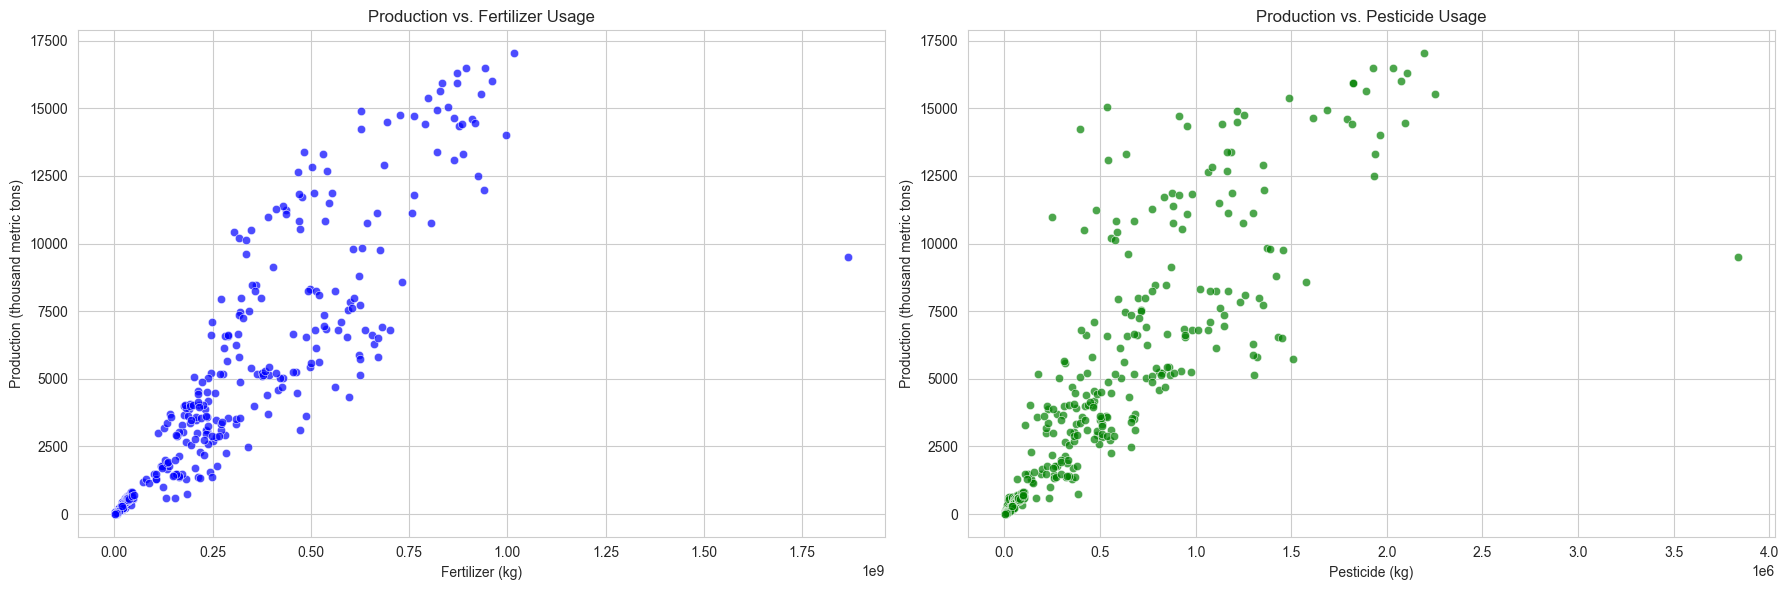

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Production vs. Fertilizer Usage
sns.scatterplot(ax=ax[0], data=data, x='Fertilizer', y='Production', color='blue', alpha=0.7)
ax[0].set_title('Production vs. Fertilizer Usage')
ax[0].set_xlabel('Fertilizer (kg)')
ax[0].set_ylabel('Production (thousand metric tons)')

# Production vs. Pesticide Usage
sns.scatterplot(ax=ax[1], data=data, x='Pesticide', y='Production', color='green', alpha=0.7)
ax[1].set_title('Production vs. Pesticide Usage')
ax[1].set_xlabel('Pesticide (kg)')
ax[1].set_ylabel('Production (thousand metric tons)')

plt.tight_layout()
plt.show()

In [12]:
production_fertilizer_corr = data['Production'].corr(data['Fertilizer'])
production_pesticide_corr = data['Production'].corr(data['Pesticide'])

print("Correlation between Production and Fertilizer Usage:", production_fertilizer_corr)
print("Correlation between Production and Pesticide Usage:", production_pesticide_corr)

Correlation between Production and Fertilizer Usage: 0.9072773726244224
Correlation between Production and Pesticide Usage: 0.8679739533118362


# Analysis of Production vs. Fertilizer and Pesticide Usage

### Production vs. Fertilizer Usage

* The plot indicates that up to a certain point, an increase in fertilizer use is associated with higher production. There's a group of points suggesting that higher production levels tend to correspond with moderate to high fertilizer usage. That is with increase of fertilizer usage production generally goes up and the relationship is almost linear.

* A correlation coefficient of approximately 0.91 indicates a very strong positive relationship, signifying that as the quantity of fertilizer used increases, so does production. This high correlation suggests that fertilizer usage is a key factor in influencing production outcomes. 

* It's possible that after a certain threshold, additional fertilizer does not significantly increase production. This could be due to factors such as nutrient saturation or other limiting factors in the agricultural process.

### Production vs. Pesticide Usage

* The plot shows a more scattered relationship between production and pesticide usage. While there is a cluster of data points at lower levels of pesticide usage corresponding to lower production values, higher production values are spread across a wider range of pesticide usage but mostly following a linear trend.

* A correlation coefficient of approximately 0.87, while slightly lower than that for fertilizer, still indicates a strong positive relationship with production. This implies that pesticide usage is also significantly correlated with higher production levels, though there may be a point where additional pesticide does not correspond to an equivalent increase in production.





# Rice Production vs. Area under Cultivation

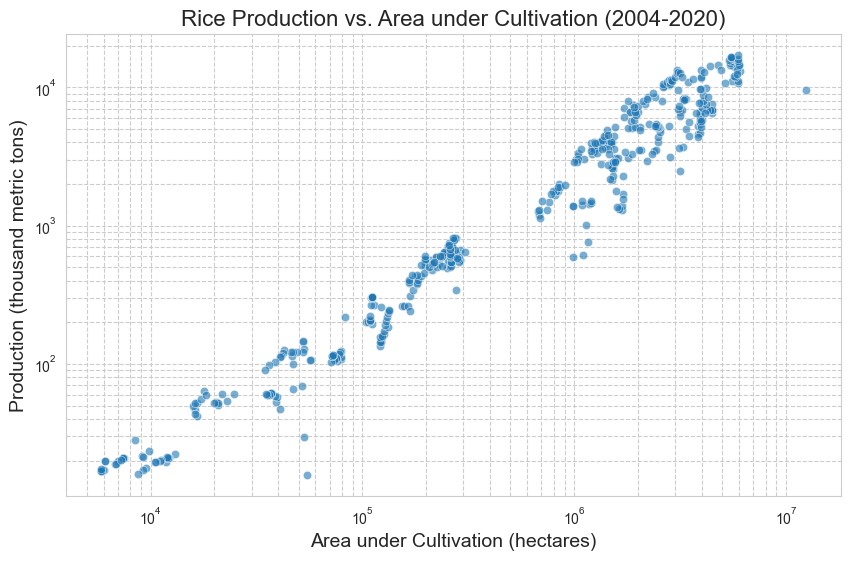

In [14]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area', y='Production', data=data, alpha=0.6)

plt.title('Rice Production vs. Area under Cultivation (2004-2020)', fontsize=16)
plt.xlabel('Area under Cultivation (hectares)', fontsize=14)
plt.ylabel('Production (thousand metric tons)', fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="--")

plt.show()

The scatter plot illustrates the relationship between the Area under cultivation (in hectares) and Production (in thousand metric tons) for rice crops, with both axes on a logarithmic scale to better accommodate the wide range of values and highlight the relationship.

From the plot, we can observe a general trend that as the area under cultivation increases, the production also tends to increase, which is expected. However, the variation in production for a given area indicates that other factors (such as rainfall, fertilizer, and pesticide usage, among others) might also significantly influence production levels.